## A comprehensive hyperledger fabric performance evaluation based on resources capacity planning
Published in [Cluster Computing](https://link.springer.com/article/10.1007/s10586-024-04591-4) - June, 2024

**Authors**: Carlos Melo, Glauber Gonçalves, Francisco A. Silva & André Soares

**Abstract**: _Hyperledger Fabric is a platform for permissioned blockchain networks that enables secure and auditable distributed data storage for enterprise applications. There is a growing interest in applications based on this platform, but its use requires the configuration of different blockchain parameters. Various configurations impact the system’s non-functional qualities, especially performance and cost. In this article, we propose a Stochastic Petri Net to model the performance of the Hyperledger Fabric platform with different blockchain parameters, computer capacity, and transaction rates. We also present a set of case studies to demonstrate the feasibility of the proposed model. This model serves as a practical guide to help administrators of permissioned blockchain networks find the best performance for their applications. The proposed model allowed us to identify the block size that leads to a high mean response time (ranging from 1 to 25 seconds) caused by a change in the arrival rate._

-----------------

**Pre-Print available [here](https://casm3.github.io/assets/publications/pdf/journals/journal-blockchain-2024.pdf)**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Extract data function

In [8]:
# Plot generation function, once the data is stored in different csv files this option enabled problem generalization
def generate_plot(path, ylabel):
    column_names = ['Taxa_de_Chegada', 'cp_n=2', 'cp_n=4', 'cp_n=6']
    df = pd.read_csv(path, delimiter=';', names=column_names, header=None)
    
    # Extracts x values (Arrival Rate) and y values (utilization) for each capacity cp_n (n in [2, 4, 6])
    x_values = []
    y_cp2_values = []
    y_cp4_values = []
    y_cp6_values = []
    
    for index, row in df.iterrows():
        # Extracts arrival rate
        x_value = float(row['Taxa_de_Chegada'])
        x_values.append(x_value)
        
        # Extracts utilization for when n=2
        y_cp2_value = float(row['cp_n=2'].split('/')[0])
        y_cp2_values.append(y_cp2_value)
        
        # Extracts utilization for when n=4
        y_cp4_value = float(row['cp_n=4'].split('/')[0])
        y_cp4_values.append(y_cp4_value)
        
        # Extracts utilization for when n=6
        y_cp6_value = float(row['cp_n=6'].split('/')[0])
        y_cp6_values.append(y_cp6_value)

    line_plotter(x_values, y_cp2_values, y_cp4_values, y_cp6_values, ylabel)

### Line plotter

In [9]:
def line_plotter(x_values, y_cp2_values, y_cp4_values, y_cp6_values, ylabel):
    plt.figure(figsize=(10, 8))
    
    plt.plot(x_values, y_cp2_values, marker='o', linestyle='-', color='green', label='cp_n=2', linewidth=3)
    
    plt.plot(x_values, y_cp4_values, marker='x', linestyle='-', color='red', label='cp_n=4', linewidth=3)
    
    plt.plot(x_values, y_cp6_values, marker='s', linestyle='-', color='black', label='cp_n=6', linewidth=3)
    
    plt.xlabel('Arrival Rate (tps)', fontsize=26)
    plt.ylabel(ylabel + ' (%)', fontsize=26)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    
    # Enable smaller ticks in both axis
    plt.minorticks_on()
    
    # Defines ticks size on both axis
    plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='in', length=5)
    plt.tick_params(axis='y', which='both', left=True, right=False, direction='in', length=5)
    
    # Adjusts legend fontsize and position
    plt.legend(fontsize=18, loc='lower right')
    
    # --- Save plots as a pdf ---
    # plt.savefig(path.split('.')[0]+'.pdf', bbox_inches='tight')
    
    plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Utilization plots

### Endosser Utilization (U_END)

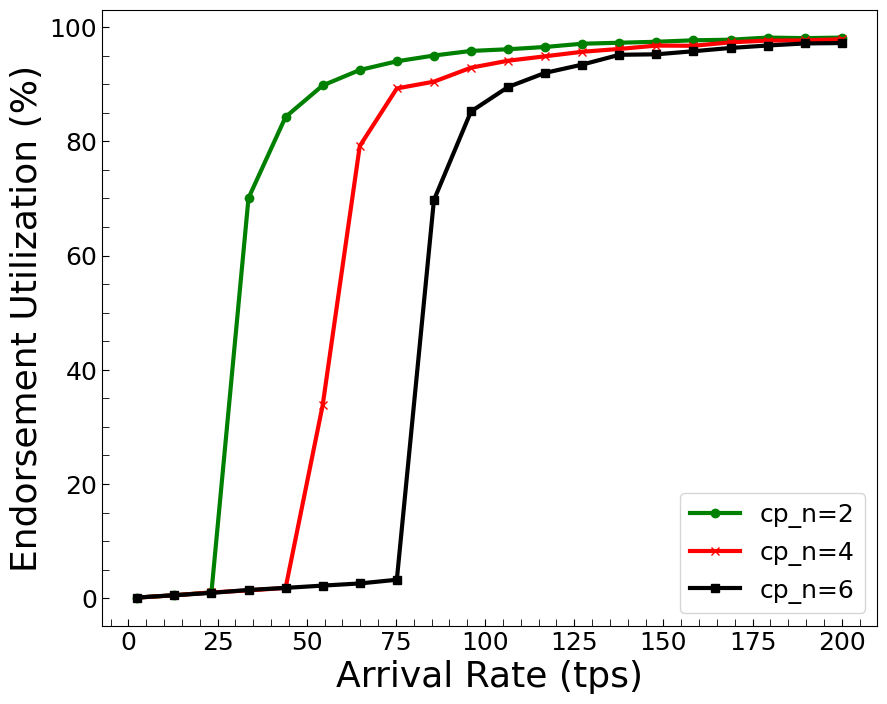

In [10]:
generate_plot('data/u_end.csv', 'Endorsement Utilization')

### Orderer Utilization (U_ORD)

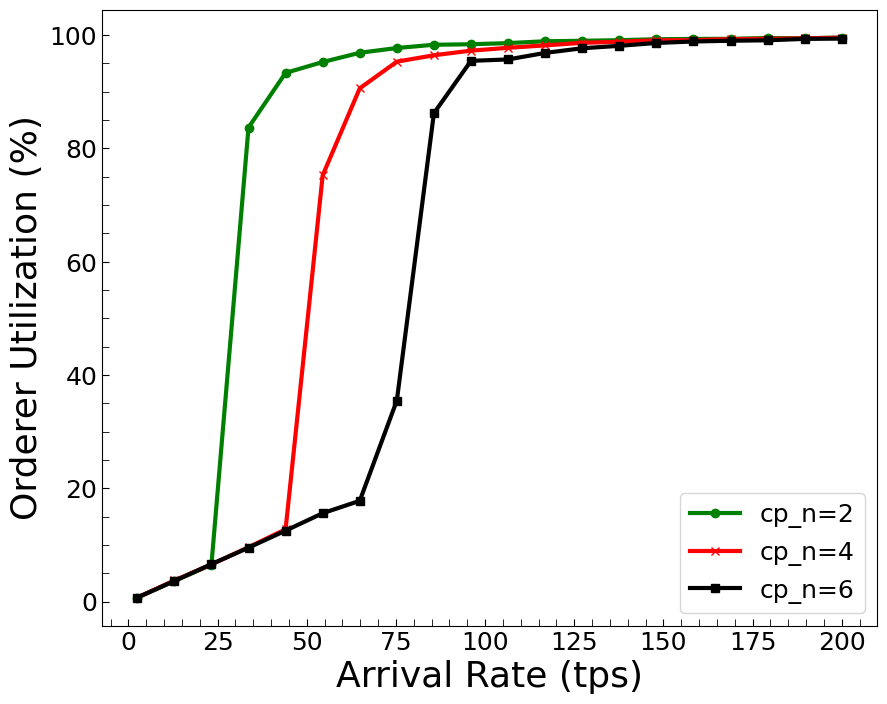

In [12]:
generate_plot('data/u_ORD.csv', 'Orderer Utilization')

### Commit Utilization (U_COMMIT)

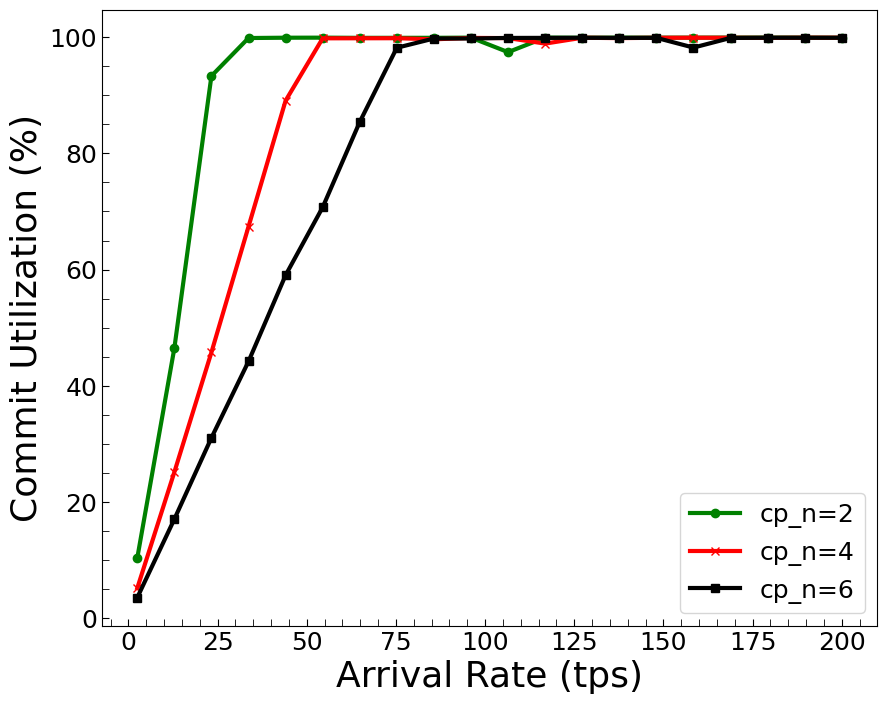

In [13]:
generate_plot('data/u_COMMIT.csv', 'Commit Utilization')

### Discard Probability (DROP_PROB)

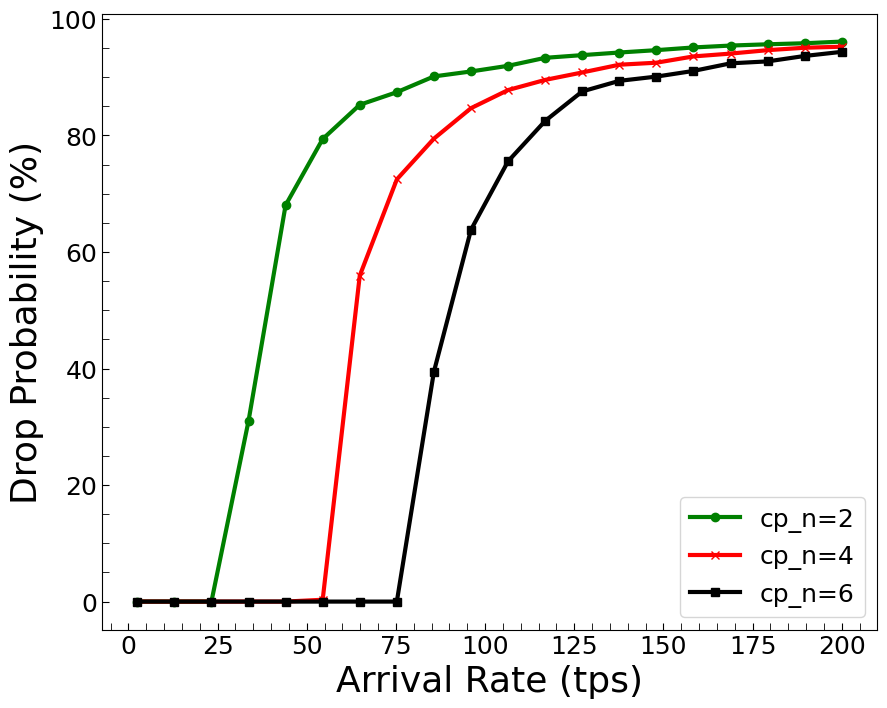

In [14]:
generate_plot('data/dp_prob.csv', 'Drop Probability')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Throughpout plots

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_plot_v(path, ylabel):
    column_names = ['Taxa_de_Chegada', 'cp_n=2', 'cp_n=4', 'cp_n=6']
    df = pd.read_csv(path, delimiter=';', names=column_names, header=None)
    
    # Extrair os valores de x (Taxa de Chegada) e y (Utilização) para cada capacidade cp_n
    x_values = []
    y_cp2_values = []
    y_cp4_values = []
    y_cp6_values = []
    
    for index, row in df.iterrows():
        # Extrair a Taxa de Chegada
        x_value = float(row['Taxa_de_Chegada'])
        x_values.append(x_value)
        
        # Extrair a Utilização para cp_n=2
        y_cp2_value = float(row['cp_n=2'].split('/')[0])  # Apenas o primeiro valor do par
        y_cp2_values.append(y_cp2_value)
        
        # Extrair a Utilização para cp_n=4
        y_cp4_value = float(row['cp_n=4'].split('/')[0])  # Apenas o primeiro valor do par
        y_cp4_values.append(y_cp4_value)
        
        # Extrair a Utilização para cp_n=6
        y_cp6_value = float(row['cp_n=6'].split('/')[0])  # Apenas o primeiro valor do par
        y_cp6_values.append(y_cp6_value)
    
    # Criar o gráfico de linhas
    plt.figure(figsize=(10, 8))
    
    # Plotar os dados para cp_n=2
    plt.plot(x_values, y_cp2_values, marker='o', linestyle='-', color='green', label='cp_n=2', linewidth=3)
    
    # Plotar os dados para cp_n=4
    plt.plot(x_values, y_cp4_values, marker='x', linestyle='-', color='red', label='cp_n=4', linewidth=3)
    
    # Plotar os dados para cp_n=6
    plt.plot(x_values, y_cp6_values, marker='s', linestyle='-', color='black', label='cp_n=6', linewidth=3)
    
    # Adicionar título e rótulos aos eixos
    plt.xlabel('Arrival Rate (tps)', fontsize=26)
    plt.ylabel(ylabel, fontsize=26)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    
    # Habilitar ticks menores nos eixos x e y
    plt.minorticks_on()
    
    # Configurar traços menores nos eixos x e y
    plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='in', length=5)
    plt.tick_params(axis='y', which='both', left=True, right=False, direction='in', length=5)
    
    # Ajustar o tamanho da fonte da legenda
    plt.legend(fontsize=18, loc='lower right')
    
    # Salvar o gráfico como PDF
    plt.savefig(path.split('.')[0]+'.pdf', bbox_inches='tight')
    
    # Exibir o gráfico
    plt.show()

# Throughput

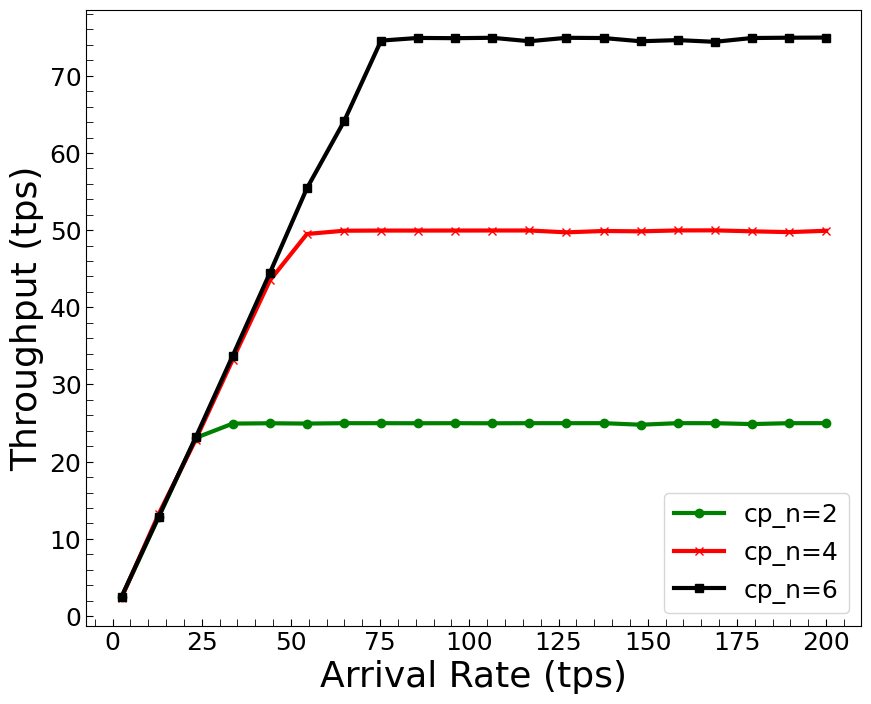

In [125]:
generate_plot_v('tp.csv', 'Throughput (tps)')

# MRT

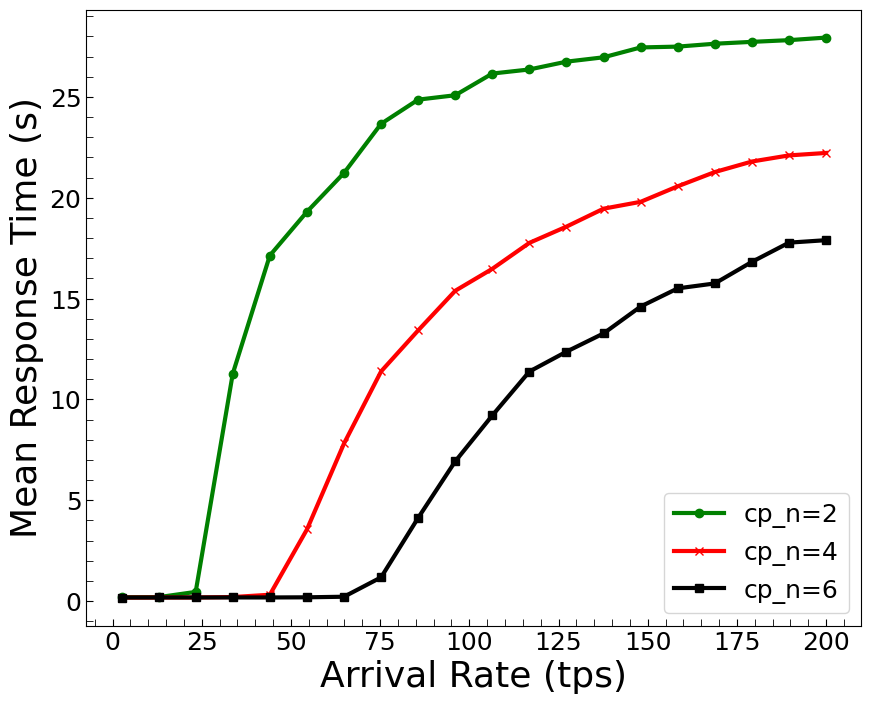

In [126]:
generate_plot_v('mrt.csv', 'Mean Response Time (s)')

# BLOCK_CALL_RATE

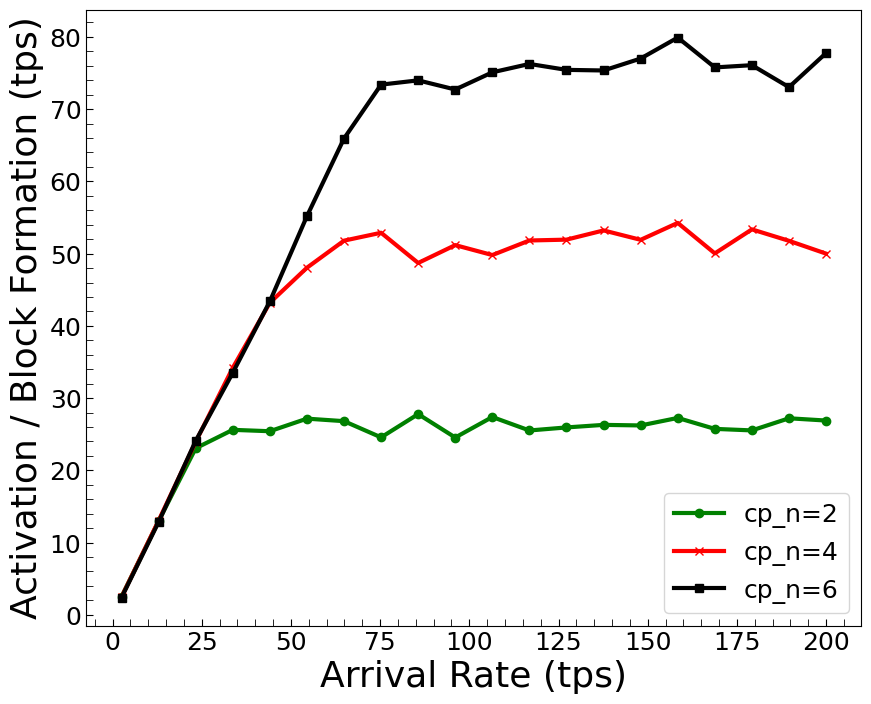

In [127]:
generate_plot_v('BLOCK_CALL_RATE.csv', 'Activation / Block Formation (tps)')

In [128]:
# TIME_OUT_CALL_RATE

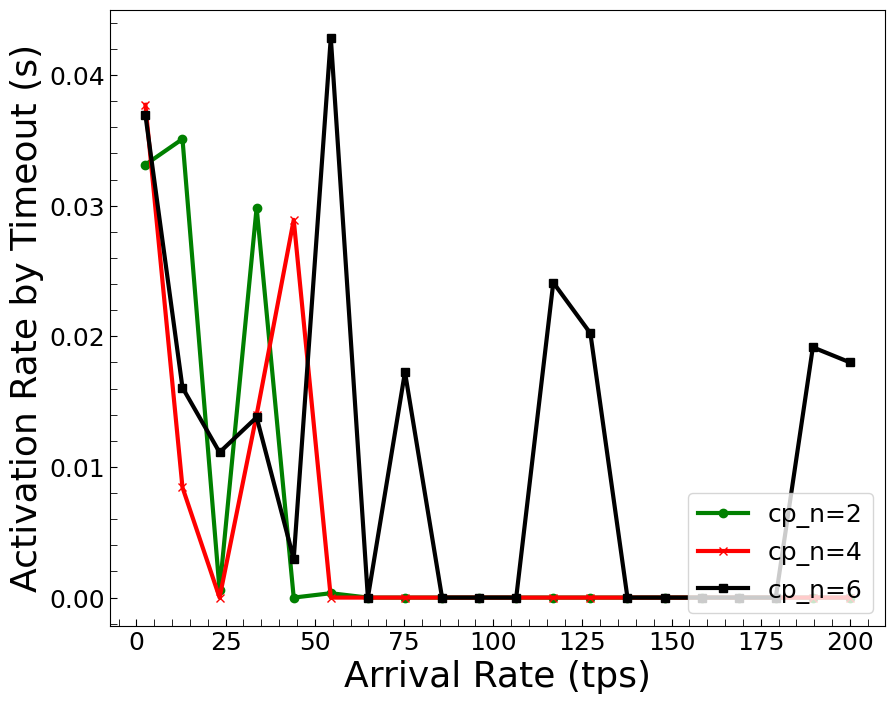

In [129]:
generate_plot_v('TIME_OUT_CALL_RATE.csv', 'Activation Rate by Timeout (s)')

In [130]:
!python3 -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


# Individual Block and Timeout

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_plot_v4(path, ylabel, metric, column, cor):
    df = pd.read_csv(path)
    
    # Extrair os valores de x (Taxa de Chegada) e y (Utilização) para cada capacidade cp_n
    x_values = []
    dp_prob_values = []
    
    for index, row in df.iterrows():
        x_value = float(row[metric])
        x_values.append(x_value)
        
        dp_prob_value = float(row[column])  # Apenas o primeiro valor do par
        dp_prob_values.append(dp_prob_value)
    
    # Criar o gráfico de linhas
    plt.figure(figsize=(10, 8))
    
    plt.plot(x_values, dp_prob_values, marker='o', linestyle='-', color=cor, linewidth=3)
    
    
    # Adicionar título e rótulos aos eixos
    plt.xlabel(metric.replace('_', " ").title() + " (s)", fontsize=26)
    plt.ylabel(ylabel, fontsize=26)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    
    # Habilitar ticks menores nos eixos x e y
    plt.minorticks_on()
    
    # Configurar traços menores nos eixos x e y
    plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='in', length=5)
    plt.tick_params(axis='y', which='both', left=True, right=False, direction='in', length=5)
    
    # Ajustar o tamanho da fonte da legenda
    # plt.legend(fontsize=18, loc='lower right')
    
    # Salvar o gráfico como PDF
    plt.savefig(ylabel.split()[0]+path.split('.')[0]+'.pdf', bbox_inches='tight')
    
    # Exibir o gráfico
    plt.show()

# DROP BLOCK

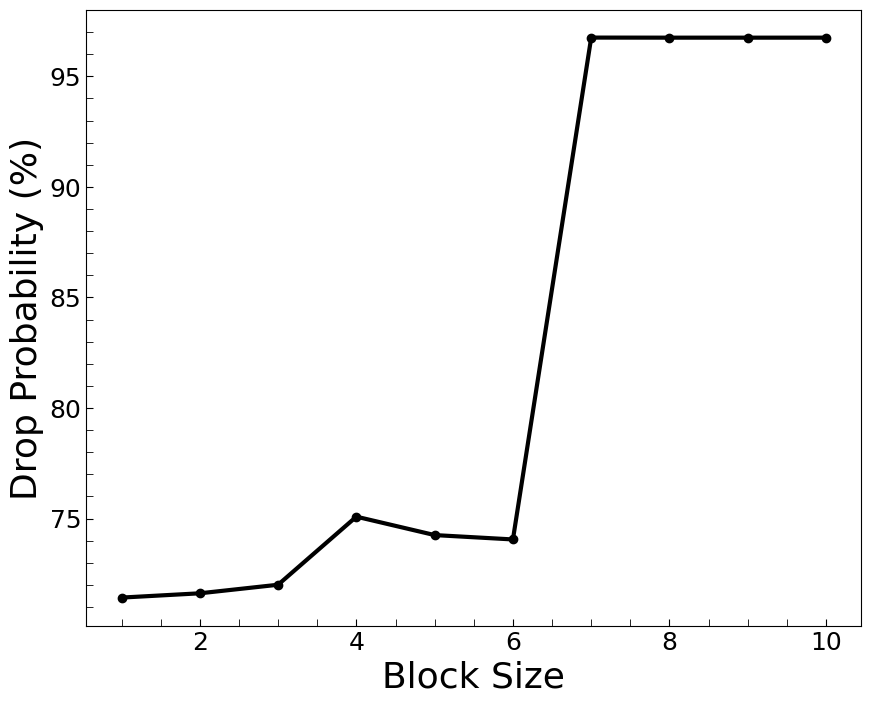

In [2]:
generate_plot_v4("dp_var_block.csv", "Drop Probability (%)", 'BLOCK_SIZE', 'DP_PROB', "black")

# DROP TIME 

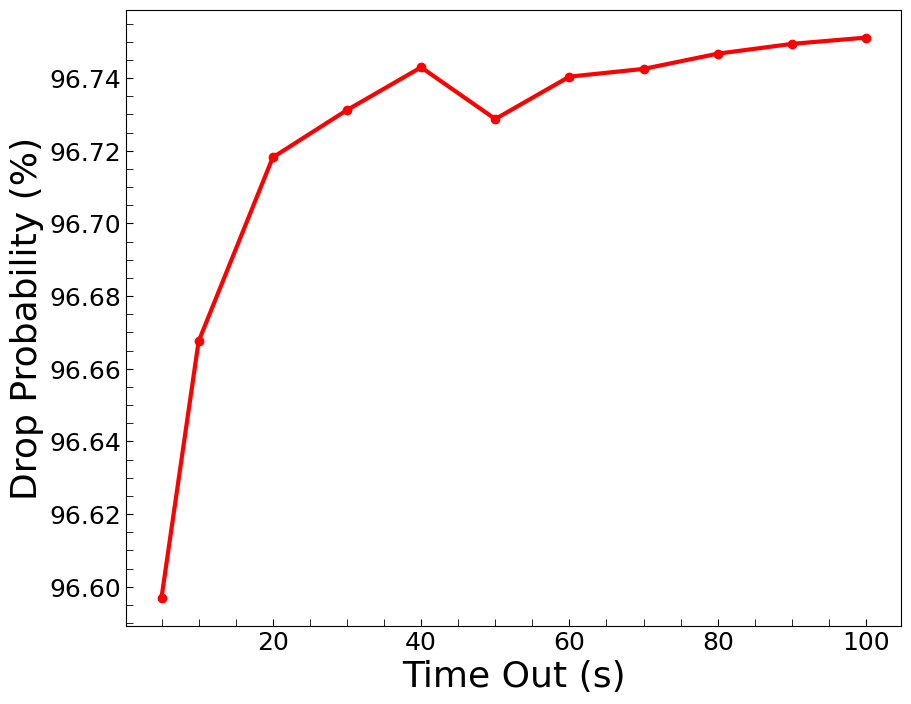

In [5]:
generate_plot_v4("dp_var_timeout.csv", "Drop Probability (%)", "TIME_OUT", "DP_PROB", "red")

# MRT BLOCK

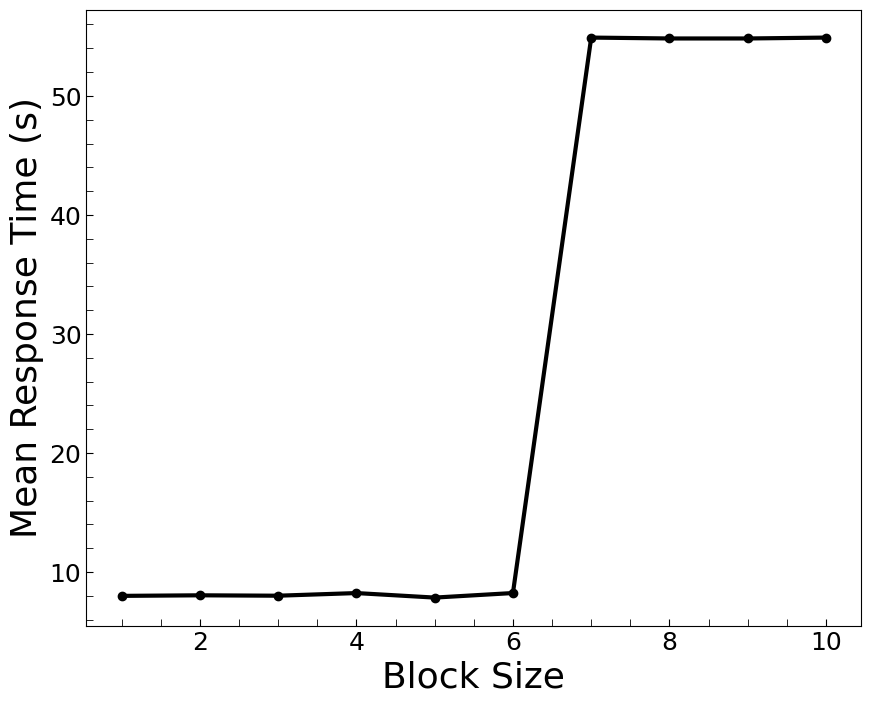

In [18]:
generate_plot_v4("dp_var_block.csv", "Mean Response Time (s)", 'BLOCK_SIZE', 'MRT', "black")

# MRT TIME

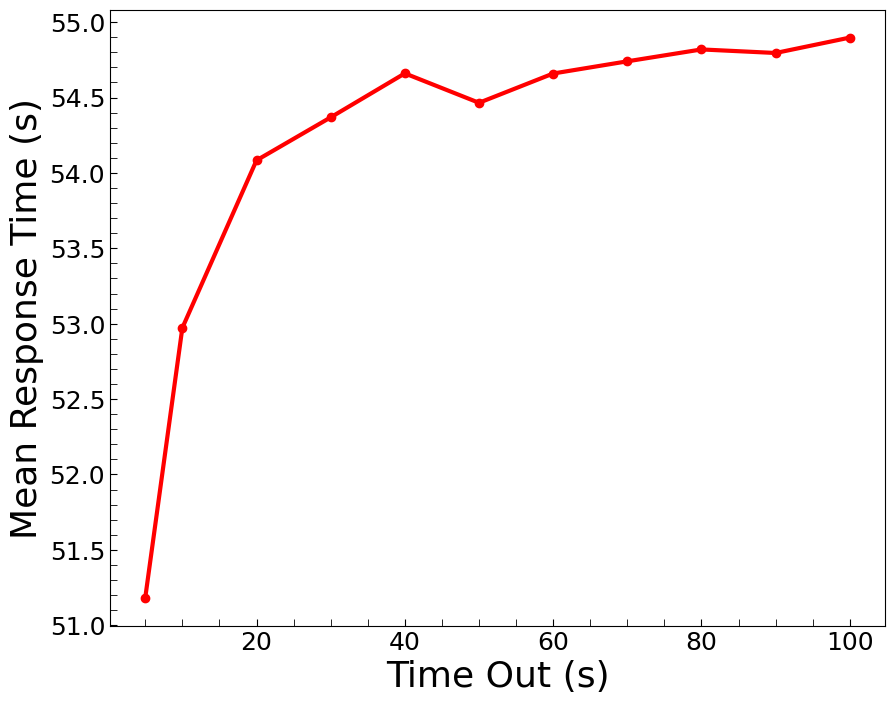

In [6]:
generate_plot_v4("mrt_var_timeout.csv", "Mean Response Time (s)", "TIME_OUT", "MRT", "red")

# TPS BLOCK

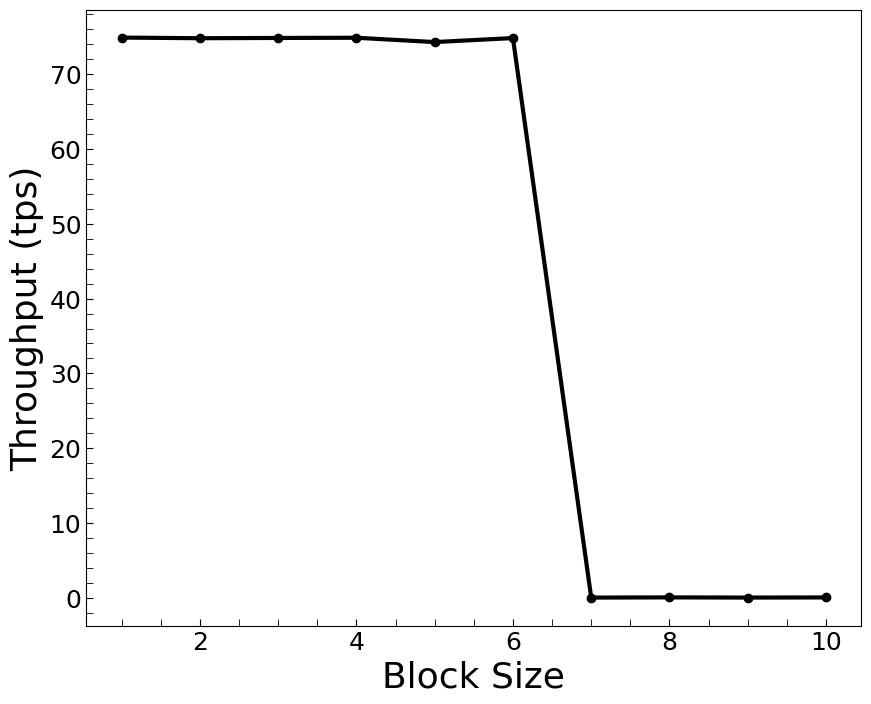

In [20]:
generate_plot_v4("dp_var_block.csv", "Throughput (tps)", 'BLOCK_SIZE', 'TP', "black")

# TPS TIME

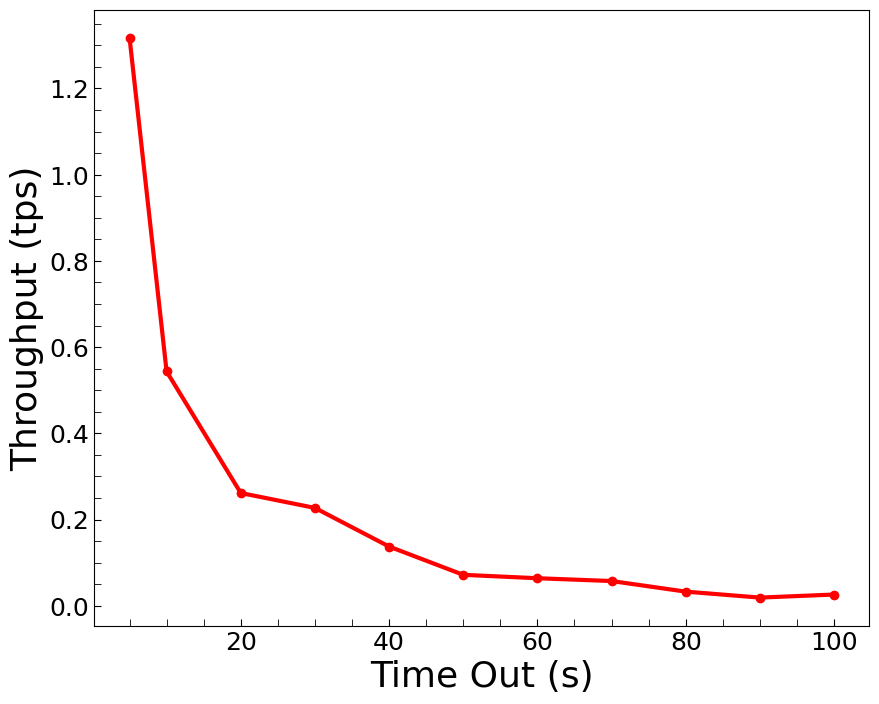

In [7]:
generate_plot_v4("tp_var_timeout.csv", "Throughput (tps)", "TIME_OUT", "TP", "red")

# Utilização

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_plot_v5(path, ylabel, metric):
    df = pd.read_csv(path)
    
    x_values = []
    y_endorsement_values = []
    y_orderer_values = []
    y_commit_values = []
    
    for index, row in df.iterrows():
        x_value = float(row[metric])
        x_values.append(x_value)
        
        y_endorsement_value = float(row["U_END"])
        y_endorsement_values.append(y_endorsement_value)
        
        y_orderer_value = float(row["U_ORD"])
        y_orderer_values.append(y_orderer_value)
        
        y_commit_value = float(row["U_COMMIT"])
        y_commit_values.append(y_commit_value)
    
    # Criar o gráfico de linhas
    plt.figure(figsize=(10, 8))
    
    # Plotar os dados para cp_n=2
    plt.plot(x_values, y_endorsement_values, marker='o', linestyle='-', color='green', label='Endorser', linewidth=3)
    
    # Plotar os dados para cp_n=4
    plt.plot(x_values, y_orderer_values, marker='x', linestyle='-', color='red', label='Orderer', linewidth=3)
    
    # Plotar os dados para cp_n=6
    plt.plot(x_values, y_commit_values, marker='s', linestyle='-', color='black', label='Commit', linewidth=3)
    
    # Adicionar título e rótulos aos eixos
    plt.xlabel(metric.replace('_', " ").title() + " (s)", fontsize=26)
    plt.ylabel(ylabel, fontsize=26)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    
    # Habilitar ticks menores nos eixos x e y
    plt.minorticks_on()
    
    # Configurar traços menores nos eixos x e y
    plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='in', length=5)
    plt.tick_params(axis='y', which='both', left=True, right=False, direction='in', length=5)
    
    # Ajustar o tamanho da fonte da legenda
    plt.legend(fontsize=18, loc='lower right')
    
    # Salvar o gráfico como PDF
    plt.savefig(path.split('.')[0]+'.pdf', bbox_inches='tight')
    
    # Exibir o gráfico
    plt.show()

# BLOCK UTILIZATION

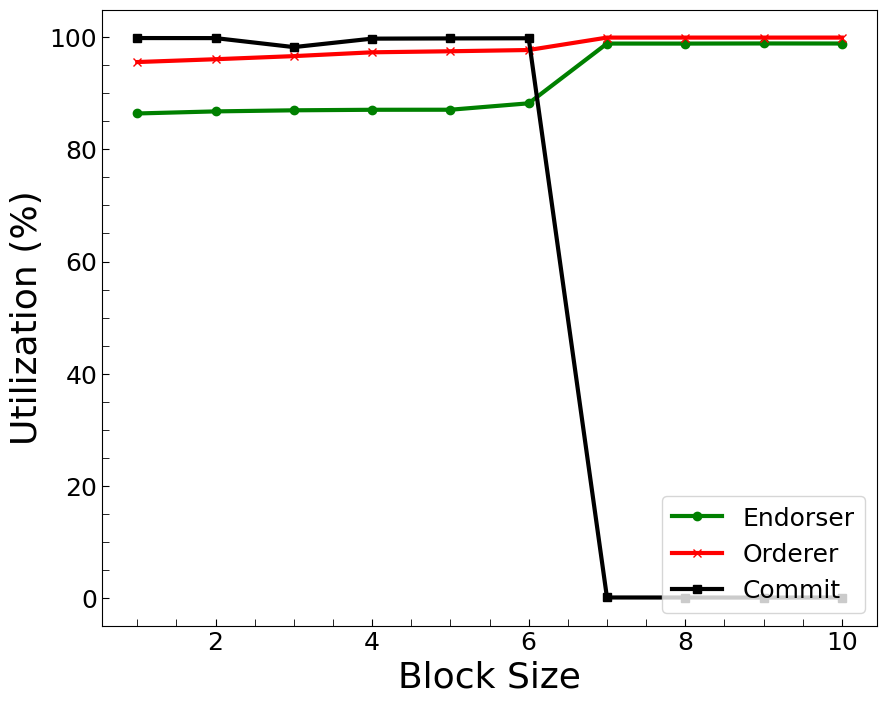

In [28]:
generate_plot_v5("dp_var_block.csv", "Utilization (%)", 'BLOCK_SIZE')

# TIME OUT UTILIZATION

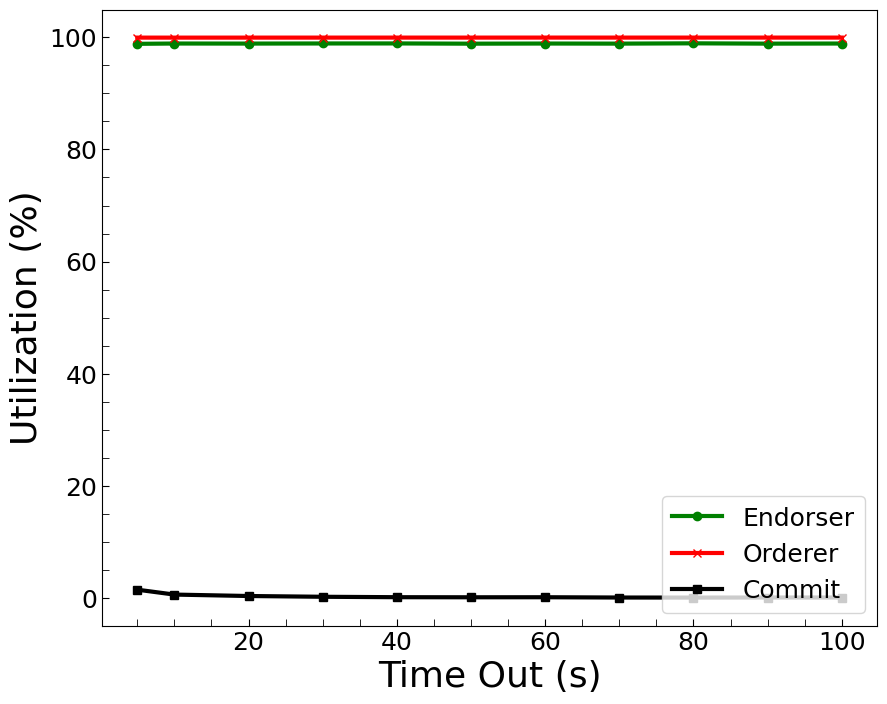

In [10]:
generate_plot_v5("u_var.csv", "Utilization (%)", 'TIME_OUT')

# CALL RATE

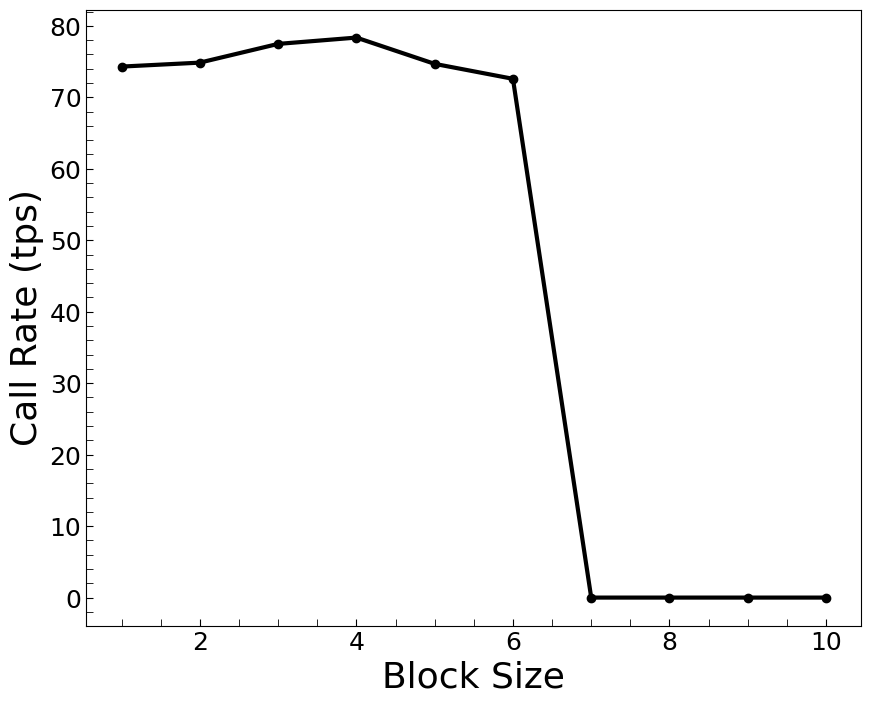

In [31]:
generate_plot_v4("dp_var_block.csv", "Call Rate (tps)", 'BLOCK_SIZE', 'BLOCK_CALL_RATE', "black")

# CALL RATE TIMEOUT

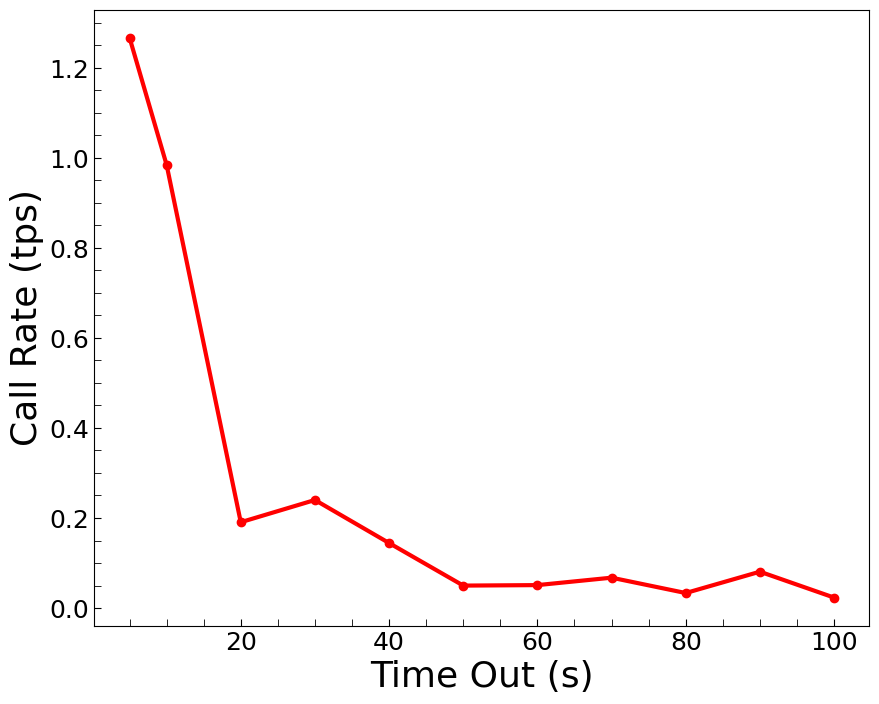

In [11]:
generate_plot_v4("call_var_timeout.csv", "Call Rate (tps)", "TIME_OUT", "TIME_OUT_CALL_RATE", "red")

# Interaction between block and timeout

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_plot_v6(path, ylabel, metric):
    df = pd.read_csv(path)
    
    x_values = []
    y_endorsement_values = []
    y_orderer_values = []
    
    for index, row in df.iterrows():
        x_value = float(row[metric])
        x_values.append(x_value)
        
        y_endorsement_value = float(row["BLOCK_CALL_RATE"])
        y_endorsement_values.append(y_endorsement_value)
        
        y_orderer_value = float(row["TIME_OUT_CALL_RATE"])
        y_orderer_values.append(y_orderer_value)
    
    # Criar o gráfico de linhas
    plt.figure(figsize=(10, 8))
    
    # Plotar os dados para cp_n=2
    plt.plot(x_values, y_endorsement_values, marker='o', linestyle='-', color='red', label='Block', linewidth=3)
    
    # Plotar os dados para cp_n=4
    plt.plot(x_values, y_orderer_values, marker='x', linestyle='-', color='black', label='Time out', linewidth=3)
    
    # Adicionar título e rótulos aos eixos
    plt.xlabel(metric.replace('_', " ").title() + " (s)", fontsize=26)
    plt.ylabel(ylabel, fontsize=26)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    
    # Habilitar ticks menores nos eixos x e y
    plt.minorticks_on()
    
    # Configurar traços menores nos eixos x e y
    plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='in', length=5)
    plt.tick_params(axis='y', which='both', left=True, right=False, direction='in', length=5)
    
    # Ajustar o tamanho da fonte da legenda
    plt.legend(fontsize=18, loc='lower right')
    
    # Salvar o gráfico como PDF
    plt.savefig(path.split('.')[0]+'.pdf', bbox_inches='tight')
    
    # Exibir o gráfico
    plt.show()

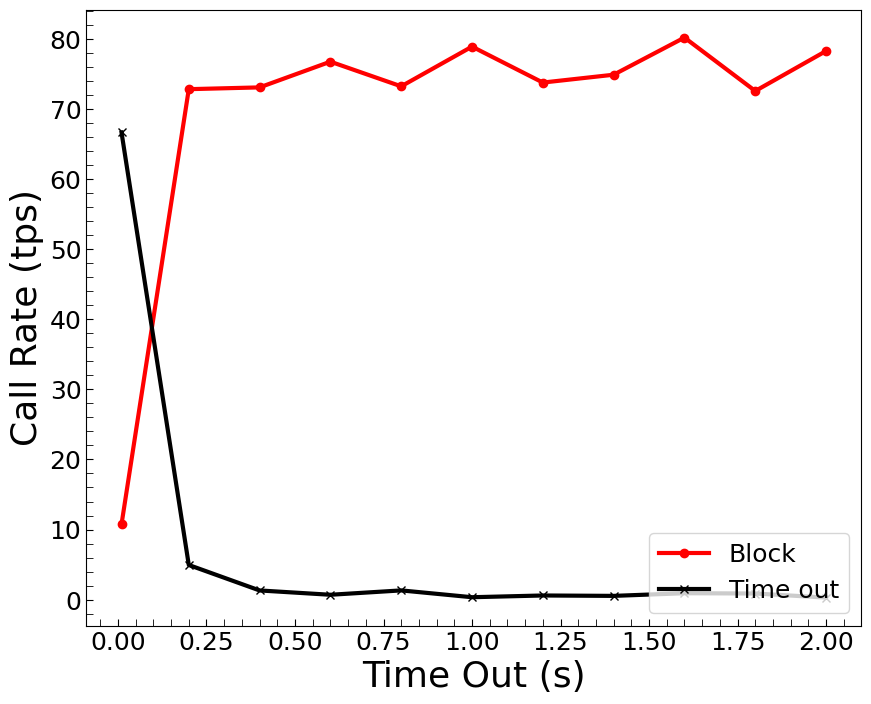

In [13]:
generate_plot_v6("inter_var_timeout.csv", "Call Rate (tps)", 'TIME_OUT')

Modelo: mode_copy.xml
Parâmetros:
Simulation Error Percentage: 0.05
AD=10
CCP=6
CEP=6
COP=6
CEQ=100
COQ=100
CCQ=100
TE=0.005
TO3=0.01
TC=0.08
bloco=10.0
TIME_OUT=10
TO1=0.005
TO2=0.002